# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 6

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 15 баллов
* Задача 2 &mdash; 20 баллов
* Задача 3 &mdash;  20 баллов
* Задача 4 &mdash;  25 баллов
* Задача 5 &mdash; 25 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 6 &mdash; 35 баллов
* Задача 7 &mdash; 40 баллов


-----

In [2]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(palette='Set2')

### <b><i><font color="blue">Легкая часть</font></i></b> 
### Задача 1

Для критерия Вальда для проверки гипотез с $\mathsf{H}_0: \theta = \theta_0$ найдите мощность критерия, а также эквивалентный доверительный интервал для
- двустронней альтернативы (мощность была выведена на лекции)

$\beta_s(\theta) = 1 - \Phi(z_{1-\frac{\alpha}{2}}-\omega(\theta)), \omega(\theta) = \frac{\theta-\theta_0}{\widehat{\sigma}}$

$(\widehat{\theta} \pm z_{1-\frac{\alpha}{2}}\frac{\widehat{\sigma}}{\sqrt{n}})$

- левосторонней альтернативы

$\beta_s(\theta) = 1 - \Phi(z_{1-\alpha}-\omega(\theta))$

$(-\infty, \widehat{\theta} - z_{\alpha}\frac{\widehat{\sigma}}{\sqrt{n}})$

- правосторонней альтернативы

$\beta_s(\theta) = \Phi(z_{\alpha}-\omega(\theta))$

$(\widehat{\theta} + z_{1-\alpha}\frac{\widehat{\sigma}}{\sqrt{n}}, +\infty)$

### Задача 2
 Пусть $X = ( X_1, ... X_n)$ &mdash; выборка из неизвестного распределения $\mathsf{P} \in \{ \mathsf{P}_{\theta} | \theta \in \Theta \}$
и для проверки гипотез $\mathsf{H}_0 \colon \theta \in [−1, 1]$   vs.  $\mathsf{H}_1 \colon \theta \notin [−1, 1]$ используется критерий
$S = \{x \in \mathbb{R}^n | T(x) > 1\}$. Предположим, $T(x)$ имеет распределение $\mathcal{N}(\theta, 1)$. Какие
ответы возможны в результате проверки данных гипотез и в каких случаях? Найдите
вероятность ошибки первого рода.

*Указание:*
- Не забудьте, что в определении вероятности ошибки I рода стоит супремум по всем параметрам из основной гипотезы
- Можно показать, где достигается супремум графически. Например, с помощью `sps.norm`, где параметр `loc` отвечает за сдвиг.


$P(I_s) = sup_{\theta \in \Theta_0} P_\theta(x\in S) = P_\theta(x\in S)|_{\theta = 1}$

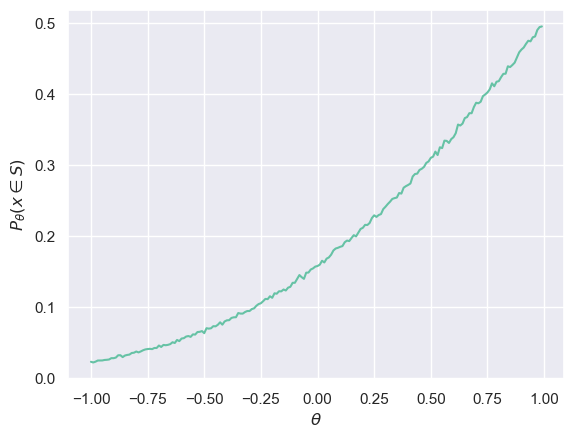

In [42]:
sample_size = 30000
theta = np.array([np.arange(-1,1,0.01)]*sample_size)
T = sps.norm.rvs(loc = theta, size = (sample_size,200)).T
y = np.zeros(200)
for i in range (200):
    time_T = T[i]
    y[i] = len(time_T[time_T>1])/sample_size
plt.plot(theta[0], y);
plt.xlabel(r'$\theta$')
plt.ylabel(r'$P_\theta(x\in S)$');

### Задача 3

Проведен эксперимент, получены данные из экспоненциального распределения. 

In [48]:
sample = np.array([[0.11731702, 0.75253036, 0.32918642, 0.22823564, 0.04240622,
        0.04239907, 0.01495969, 0.50280772, 0.22977054, 0.30781252,
        0.00519983, 0.87588937, 0.44660739, 0.05967191, 0.05016975,
        0.05065286, 0.09068843, 0.18598196, 0.14138427, 0.08605575,
        0.23659272, 0.03755863, 0.08637888, 0.1140693 , 0.15223367,
        0.384484  , 0.05568397, 0.18050729, 0.22437618, 0.01189096]])

Необходимо проверить, является ли это распределение с параметром $\lambda=2$. Используя Критерий Вальда, сделайте вывод по данному предположению.

$X_1, ... X_n$ - выборка из распределения $Exp(\theta)$.  
Проверьте гипотезу $\mathsf{H}_0\colon \theta = 2$ c правосторонней и левосторонней альтернативами.

1. Оформите функцию подсчета статистики критерия, p-value и доверительного интервала 

param sample: реализация выборки $\newline$
param theta: истинное значение параметра$\newline$
param estimation_theta: оценка параметра$\newline$
param estimation_sigma: оценка асимптотической дисперсии оценки estimation_sigma$\newline$
param alternative: вид альтернативной гипотезы, может принимать одно из значений 'two_sided', 'less', 'greater'$\newline$
return statistic$\newline$
return p_value$\newline$
return conf_int - доверительный интервал$\newline$

Т.к. в задании не требуется two-side, я его реализовывать не буду

In [43]:
alpha = 0.05
theta = 2 # тета из основной гипотезы

In [44]:
def wald_test(sample, theta, estimation_theta, estimation_sigma, alternative='two_sided'):
    if alternative == "less":       return(wald_test_left(sample, theta, estimation_theta, estimation_sigma))
    if alternative == "greater":    return(wald_test_right(sample, theta, estimation_theta, estimation_sigma))
    if alternative == "two_sided":  return(wald_test_two_sided(sample, theta, estimation_theta, estimation_sigma))
    
def wald_test_left(sample, theta, estimation_theta, estimation_sigma):
    n = len(sample[0])
    z = sps.norm.ppf(alpha)
    statistic = np.sqrt(n)*(estimation_theta-theta)/estimation_sigma
    p_value = sps.norm.cdf(statistic)
    conf_int = np.array([estimation_theta-z*estimation_sigma/np.sqrt(n),np.inf])
    return [statistic, p_value, conf_int.T]

def wald_test_right(sample, theta, estimation_theta, estimation_sigma):
    n = len(sample[0])
    z = sps.norm.ppf(1-alpha)
    statistic = np.sqrt(n)*(estimation_theta-theta)/estimation_sigma
    p_value = sps.norm.sf(statistic)
    conf_int = np.array([-np.inf,estimation_theta-z*estimation_sigma/np.sqrt(n)])
    return [statistic, p_value, conf_int.T]

def wald_test_two_sided(sample, theta, estimation_theta, estimation_sigma):
    n = len(sample[0])
    z = sps.norm.ppf(1-alpha/2)
    statistic = np.sqrt(n)*(estimation_theta-theta)/estimation_sigma
    p_value = 2*sps.norm.sf(np.absolute(statistic))
    conf_int = np.array([estimation_theta-z*estimation_sigma/np.sqrt(n),estimation_theta+z*estimation_sigma/np.sqrt(n)])
    return [statistic, p_value, conf_int.T]

2. Проверьте гипотезу с правосторонней альтернативой.

In [49]:
print('p_value = ' + str(wald_test(sample, theta, 1/sample.mean(), sample.mean(), 'greater')[1].round(3)))
print('интервал = ' + str(wald_test(sample, theta, 1/sample.mean(), sample.mean(), 'greater')[2].round(3)))

p_value = 0.0
интервал = [ -inf 4.904]


**Вывод:** $H_0$ можно смело отклонять

3. Проверьте гипотезу с левосторонней альтернативой.

In [67]:
print('p_value = ' + str(wald_test(sample, theta, 1/sample.mean(), sample.mean(), 'less')[1].round(3)))
print('интервал = ' + str(wald_test(sample, theta, 1/sample.mean(), sample.mean(), 'less')[2].round(3)))

p_value = 0.0
интервал = [1.233   inf]


**Вывод:** $H_0$ не отклоняем



### Задача 4

На практике часто рассматривают асимптотические критерии, например, критерий Вальда. Такие критерии контролируют вероятность ошибки I рода на уровне $\alpha$ только в пределе, однако для небольших выборок она может сильно отличаться от $\alpha$, причем не редко в большую сторону. Поэтому для таких критериев возникает необходимость в вычислении значения вероятности ошибки I рода или *реального уровня значимости* при конечной выборке.

Зачастую посчитать точное значение реального уровня значимости довольно сложно, поэтому вместо него вычисляют оценку с помощью семплирования по методу Монте-Карло.

Пусть гипотеза $\mathsf{H}_0$ простая, то есть $\mathsf{H}_0\colon \mathsf{P} = \mathsf{P}_0$. Для ее проверки по конечной выборке $X_1, ..., X_n$ используется критерий $S$. **Опишите схему оценки реального уровня** значимости критерия $S$ методом Монте-Карло.

**Ответ:**

- Генерируем k выборок $x^k = (x_1^k,... x_n^k)$ из распределения $\theta = \theta_0$

- Для каждого $i \in ${1,2,...k} считаем $I^i = I(x^i \in S)$

- $\widehat{P(I_s)} = \overline{I(x \in S)}$
- погрешность ~ $\frac{1}{\sqrt{k}}$

Если гипотеза $\mathsf{H}_0$ сложная, то есть $\mathsf{H}_0\colon \mathsf{P} \in \mathscr{P}_0$, то можно повторить такую процедуру несколько раз для разных $\mathsf{P} \in \mathscr{P}_0$.

Рассмотрим альтернативную гипотезу $\mathsf{H}_1\colon \mathsf{P} \in \mathscr{P}_1$. **Опишите схему оценки мощности** критерия $S$ методом Монте-Карло.

**Ответ:**

- Генерируем m на k выборок: $x^{j,i} = (x_1^{j,i},... x_n^{j,i})$ из распределения $P_i \in \mathscr{P}_1$, где $i \in ${1,2,...m}, $j \in ${1,2,...k}

- Для каждого i,j считаем $I^{j,i} = I(x^{j,i} \in S)$

- $\widehat{\beta_s(\theta)} = \overline{I(x \in S)}$

Пусть $X_1, ..., X_n$ &mdash; выборка из пуассоновского распределения с параметром $\theta$. Рассмотрим гипотезы $\mathsf{H}_0\colon \theta = 1\ \ vs.\ \ \mathsf{H}_1\colon \theta \not= 1$ и критерий Вальда для их проверки.

**1.** **Оцените реальный уровень значимости** критерия для $ n = 50$.

In [50]:
n = 50
k = 10000
theta0 = 1
sample = sps.poisson.rvs(mu = theta0, size = (k,n))
W = wald_test(sample, theta0, sample.mean(axis = 1), sample.mean(axis = 1))[0]
I_mean = len(W[W> sps.norm.ppf(1-alpha/2)])/len(W)
I_mean

0.0037

**Вывод:** Оценка реального уровня получилось малой, потому что мы взяли в качестве $\theta$ что является реальным параметром распределения.

**3.** Пусть $n=50$. **Сравните мощности критериев**, соответствующих двусторонней, левосторонней и правосторонней альтернативам при $\theta=0.2$ и при $\theta=2$.

In [51]:
print('theta  left  two   right')
theta = 0.2
sample = sps.poisson.rvs(mu = theta, size = (k,n))
W_right = wald_test(sample, theta, sample.mean(axis = 1), sample.mean(axis = 1), 'greater')[0]
W_left = wald_test(sample, theta, sample.mean(axis = 1), sample.mean(axis = 1), 'less')[0]
W_two = wald_test(sample, theta, sample.mean(axis = 1), sample.mean(axis = 1))[0]
I_right = len(W_right[W_right > sps.norm.ppf(1-alpha)])/len(W_right)
I_left = len(W_left[W_left < sps.norm.ppf(alpha)])/len(W_left)
I_two = len(W_two[np.absolute(W_two) > sps.norm.ppf(1-alpha/2)])/len(W_two)
print('0.2   ', I_left, I_two, I_right)

theta = 2
sample = sps.poisson.rvs(mu = theta, size = (k,n))
W_right = wald_test(sample, theta, sample.mean(axis = 1), sample.mean(axis = 1), 'greater')[0]
W_left = wald_test(sample, theta, sample.mean(axis = 1), sample.mean(axis = 1), 'less')[0]
W_two = wald_test(sample, theta, sample.mean(axis = 1), sample.mean(axis = 1))[0]
I_right = len(W_right[W_right > sps.norm.ppf(1-alpha)])/len(W_right)
I_left = len(W_left[W_left < sps.norm.ppf(alpha)])/len(W_left)
I_two = len(W_two[np.absolute(W_two) > sps.norm.ppf(1-alpha/2)])/len(W_two)
print('2     ', I_left, I_two, I_right)

theta  left  two   right
0.2    0.3327 0.3595 0.1376
2      0.0254 0.0115 0.0016


C:\Users\AsusPro\AppData\Local\Temp\ipykernel_29100\2834974133.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  conf_int = np.array([-np.inf,estimation_theta-z*estimation_sigma/np.sqrt(n)])
C:\Users\AsusPro\AppData\Local\Temp\ipykernel_29100\2834974133.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  conf_int = np.array([estimation_theta-z*estimation_sigma/np.sqrt(n),np.inf])


**Вывод:**

Мы хотим максимизировать мощность, поэтому стоит брать $H_0$: $\theta$ = 0.2  и $H_1$: $\theta \neq 0.2$



### Задача 5

**Профиль физика**

Период колебания математического маятника можно расчиатать по следующей формуле:
$$T = 2\pi \sqrt{\frac{l}{g}}$$
Вы выполнили лабораторную работу по вычислению ускорения свободного падения. Длина нити маятника 50 см. В своей работе вы измеряли время 10 полных колебаний (10 периодов) с помощью обычного секундомера и получили такие значение: 




In [38]:
T_sample = np.array([[14.47, 14.46, 14.73, 14.74, 16.14, 12.6, 14.17, 12.83, 14.1, 12.81, 12.98, 
            13.84, 13.96, 13.6, 14.13, 15.32, 13.98, 13.96, 12.86, 15.46, 13.2, 15.26, 
            14.86, 14.49, 14.8, 12.92, 14.65, 14.47, 15.88, 15.04, 14.84, 15.12, 12.96, 
            16.2, 11.99, 15.57, 13.55, 13.16, 14.76, 13.79, 12.58, 14.61, 14.1, 14.54, 
            14.72, 14.87, 13.37, 14.04, 13.09, 14.7]])

Получите массив величин g, используя формулу выше.

In [90]:
n = 10
l = 0.5
g = l*4*np.pi**2/((T_sample/n)**2)
g.round(2)

array([[ 9.43,  9.44,  9.1 ,  9.09,  7.58, 12.43,  9.83, 11.99,  9.93,
        12.03, 11.72, 10.31, 10.13, 10.67,  9.89,  8.41, 10.1 , 10.13,
        11.94,  8.26, 11.33,  8.48,  8.94,  9.4 ,  9.01, 11.83,  9.2 ,
         9.43,  7.83,  8.73,  8.96,  8.63, 11.75,  7.52, 13.73,  8.14,
        10.75, 11.4 ,  9.06, 10.38, 12.47,  9.25,  9.93,  9.34,  9.11,
         8.93, 11.04, 10.01, 11.52,  9.13]])

Предположим, такие величины имеют нормальное распределение $\mathcal{N}(a, \sigma^2)$. Используйте критерий Вальда для проверки гипотезы $\mathsf{H}_0: a = 9.81$ vs $\mathsf{H}_1: a \neq 9.81$


In [91]:
a = 9.81
wald_test(g, a, g.mean(), g.var(), alternative='two_sided')

[0.5110411562794385, 0.6093222383709417, array([ 9.40669136, 10.49780594])]

**Вывод:** 

Мы не отвергаем гипотезу, так как 'a' лежит в интервале и p_value > $\alpha = 0.05$

**Профиль биология**

Испытывается эффективность препарата, понижающего температуру. Каждому пациенту измеряют температуру до и после приема препарата. В результате разность температур для испытуемых получилась равной: 


In [ ]:
a_sample = [1.19, 0.84, 1.3, 0.76, 0.99, 1.3, 0.97, 0.91, 0.97, 0.99, 1.18, 0.93, 0.84, 1.07, 0.95,
     1.01, 1.04, 0.84, 1.0, 1.19, 1.31, 0.97, 1.1, 0.86, 1.02, 0.95, 0.93, 0.84, 0.85, 0.78]

Предположим, такие величины имеют нормальное распределение $\mathcal{N}(a, \sigma^2)$. С помощью критерия Вальда проверьте гипотезу: $\mathsf{H}_0 \colon a=0$ vs. $\mathsf{H}_1 \colon a > 0$.

In [ ]:
<...>

**Вывод:**

Студенты **профиля химия** могут решать любую из задач.

--- 
### <b><i><font color="orange">Сложная часть</font></i></b> 


###  Задача 6
1. Пусть $X = ( X_1, ... X_n)$ &mdash; выборка из неизвестного распределения $\mathsf{P} \in \mathcal{N}(a, \sigma^2)$. Постройте критерий для проверки гипотез $\mathsf{H}_0 \colon a = 0 $   vs.  $\mathsf{H}_1 \colon a > 0$ уровня значимости $\alpha$.

Бонусный сложный пункт: получите выражение для p-value аналогично правостороннему критерию Вальда

*Указание:*
- Используйте статистику $T(X) = \sqrt{n - 1} \frac{\overline{X}}{s}$, использовавшуюся при построении точных доверительных интервалов в нормальной модели. Какое распределение она имеет при справедливости $\mathsf{H}_0$ (т.е. при $a = 0$)? 
- Подумайте, какой вид должен иметь критерий? При каких значениях $T(X)$ гипотезу $\mathsf{H}_0$ разумно отвергать?
- Этот критерий реализован в `scipy.stats.ttest_1samp`. Использовать для данной задачи его можно следующим образом: `sps.ttest_1samp(sample, popmean=0, alternative='greater')`. В результате применения функция вернет значение статистики критерия, p-value и количество степеней свободы. Вы можете проверить свой ответ с ее помощью.

**Ответ**

На лекции выводилось и доказывалось, что $T(X) = \sqrt{n - 1} \frac{\overline{X}}{s}$ ~ $T_{n-1}$ - распределение Стьюдента с n-1 степенями свободы

T(X) = $\sqrt{n - 1} \frac{\overline{X}}{s}$, но $a = \overline{X}$ то есть при больших "a" мы веротнее получим большие значения, тогда критерий будет иметь вид S = {T(x) > $C_{\alpha}$}

$P(I_s) = P_0(T(x) > C_{\alpha})$ Расписывая через функцию распределения Стьюдента и требуя $P(I_s) < \alpha$ и максимизируя мощьность критерия находим $C_{\alpha}$

Обозначим t = $\sqrt{n - 1} \frac{\overline{X}}{s}$ - реализация стат. критерия

p-value = 1 - $\Phi(t)$

**Проверка:**

In [90]:
sample_size = 50000000
sample = sps.norm.rvs(size =sample_size)
t = np.sqrt(sample_size-1)*sample.mean()/sample.std()
my_p_value = sps.norm.sf(t)
pv = sps.ttest_1samp(sample, popmean=0, alternative='greater')[1]
print(my_p_value, pv)

0.721822120655278 0.7218221193267538


2. Пусть  $X = ( X_1, ... X_n)$ &mdash; выборка из неизвестного распределения $\mathsf{P}$ с конечным вторым моментом. Постройте асимптотический критерий для проверки гипотез $\mathsf{H}_0 \colon EX_1 = 0 $   vs.  $\mathsf{H}_1 \colon  EX_1 > 0$ уровня значимости $\alpha$. Покажите, что при $n \to \infty$ этот критерий совпадает с критерием из первого пункта.

Не очень понимаю как это деоать для произвольного распределения... :(



### Задача 7

Это задание является продолжением задачи 6. Здесь вам необходимо наглядно сравнить два критерия из предыдущей задачи. Для этого прооделайте все пункты для обоих критериев. Обязательно подписывайте какой график к какому критерию относится.


**1.** **Оцените реальный уровень значимости** критерия для размеров выборки $1 \leqslant n \leqslant 50$ и визуализируйте полученную зависимость.

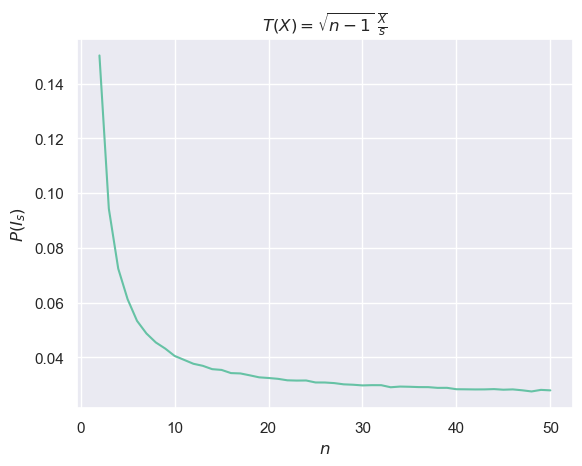

In [143]:
n_array = np.arange(2,51,1)
k = 1000000
c = sps.norm.ppf(1-alpha/2)
a = 0
y = np.zeros(len(n_array))
i = 0
for n in n_array:
    sample = sps.norm.rvs(loc = a, size = (k,n))
    T = np.sqrt(n-1)*sample.mean(axis = 1)/sample.std(axis = 1)
    y[i] = len(T[T>c])/len(T)
    i += 1
plt.plot(n_array,y)
plt.title(r'$T(X) = \sqrt{n - 1}$ $\frac{\overline{X}}{s}$')
plt.xlabel(r'$n$')
plt.ylabel(r'$P(I_s)$');

**Вывод:**

Реальный уровень значимости уменьшается при росте выборки и выходит на некоторую ненулевую константу

P.S. я убрал n = 1, так как при нём s = 0 

**2.** Для значений $n \in \{5, 15, 30, 50, 100\}$ **оцените функцию мощности критерия** для значений $\theta \in (0, 5)$ по сетке с шагом 0.25 по методу Монте-Карло. Визуализируйте полученные зависимости. Посчитайте также мощность критерия по асимптотической формуле, полученной на лекции, и сравните с оценкой мощности методом Монте-Карло. Учтите, что асимптотическая формула содержит $n$, поэтому для нее тоже должно быть три зависимости.

In [ ]:
...

**Вывод:**...

**3.** Пусть $n=50$. **Сравните мощности критериев**, соответствующих двусторонней, левосторонней и правосторонней альтернативам при $\theta \in (0, 5)$ по сетке с шагом 0.25.

In [ ]:
...

**Вывод:**...

Сделайте общий вывод по сравнению двух критериев.

**Вывод:**